# Tensile test workflow

Here, an examplary workflow of a tensile test is presented.
- The data source is obtained from a triple store via sparql queries.
- Then the elastic modulus is calculcated based on the given stress-strain data.
- The calculated elastic modulus is returned to the triple store.

It must be mentioned that the sparql endpoint here is an instance of blazegraph, running on a personal cloud machine.

### Importing and defining project from the custom defined module 

In [1]:
from pyiron_tensile_test import Project

In [2]:
pr = Project('test_tensile_job')
pr.remove_jobs_silently(recursive=True)

### Creating a job of type tensile test

In [3]:
job = pr.create.job.TensileJob(job_name='tensile_job')

### Defining the sparql endpoint and query for data source

In [4]:
job.endpoint = 'https://blazegraph.workshop-virtual.de/bigdata/sparql'

In [5]:
download_url = job.query_data_source(test_name='Tensile_Test')

In [6]:
download_url

'https://datashare.mpcdf.mpg.de/s/9N5Z1YXxMv9g09p'

### Obtaining the experimental dataset

In [7]:
job.get_dataset(url=download_url)

In [8]:
job.experimental_json

,test.metadata,test.series
object.identifier,RX5163DV,NaN
test.start-timestamp,2009-05-13T10:23:00+0200,NaN
object.length,"{'value': 50, 'unit': 'mm'}",NaN
object.cross-section-area,"{'value': 78.658, 'unit': 'mm^2'}",NaN
test.speed-1,"{'value': 0.1, 'unit': 'mm/sec'}",NaN
test.speed-2,"{'value': 0.4, 'unit': 'mm/sec'}",NaN
Young's module,"{'value': 202.1, 'unit': 'GPa'}",NaN
yield stress,"{'value': 316, 'unit': 'MPa'}",NaN
tensile strength,"{'value': 607, 'unit': 'MPa'}",NaN
fields,NaN,"[[Time, s], [Crosshead Travel, mm], [Load, kN], [Tensile Stress, MPa], [Elongation_1, %], [Elongation_2, %], [Elongation Average, %]]"


### Extracting stress and strain data from the dataset

In [9]:
job.extract_stress_strain()

In [10]:
job.input.strains

array([4.90000000e-04, 4.70000000e-04, 5.00000000e-04, ...,
       5.51814239e+01, 5.51907786e+01, 5.51935194e+01])

In [11]:
job.input.stresses

array([ 7.8400000e-03, -1.6500000e-03,  1.7400000e-03, ...,
        3.8407181e+02,  3.8266739e+02,  3.8133539e+02])

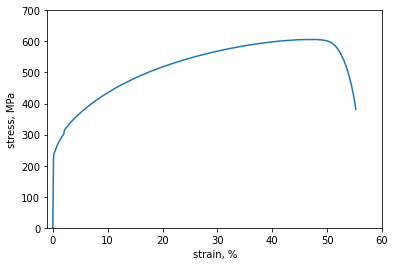

In [12]:
job.plot_stress_strain()

## Calculating the elastic modulus

In [13]:
job.run()

The job tensile_job was saved and received the ID: 355


In [14]:
job.output.elastic_modulus

201.21019550851148

### Return the calculated value to the triple store

In [15]:
job.update_triple_store()

In [16]:
job.verify_update()

correctly updated!


True

## Verifying the hdf5 file storage

In [17]:
job_load = pr.load(job.name)

In [18]:
job_load.output

DataContainer({'elastic_modulus': 201.21019550851148})

In [19]:
job_load.input

DataContainer({'test_name': 'Tensile_Test', 'strains': array([4.90000000e-04, 4.70000000e-04, 5.00000000e-04, ...,
       5.51814239e+01, 5.51907786e+01, 5.51935194e+01]), 'stresses': array([ 7.8400000e-03, -1.6500000e-03,  1.7400000e-03, ...,
        3.8407181e+02,  3.8266739e+02,  3.8133539e+02])})